In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
dataset = []

In [3]:
def getBinaryImage(image):
    return cv2.threshold(image,128,155,cv2.THRESH_BINARY)[1]


In [4]:
def getData(path):
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    #bimg = getBinaryImage(image)/255
    
    return image

In [5]:
def getImages(folder,folderId):
    PATH = f"./images/validation/{folder}"
    for img in os.listdir(PATH):
        dataset.append((getData(os.path.join(PATH,img)),folderId))

In [6]:
folders = ['angry','fear','happy', 'neutral','sad','surprise']
for idx,folder in enumerate(folders):
    getImages(folder,idx)

In [7]:
len(dataset)

6955

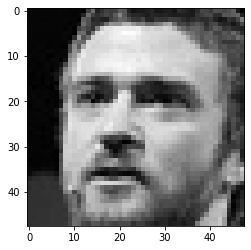

In [8]:
plt.imshow(dataset[150][0],'gray')

In [9]:
import random 
random.shuffle(dataset)

In [10]:
X_test = []
Y_test = []
for img,emotion in dataset:
    X_test.append(img)
    Y_test.append(emotion)

In [11]:
len(X_test),len(Y_test)

(6955, 6955)

In [12]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [14]:
import pickle 
test_feature = open('test_feature','wb')
pickle.dump(X_test,test_feature)
test_feature.close()

test_label = open('test_label','wb')
pickle.dump(Y_test,test_label)
test_label.close()